In [89]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

df = pd.read_csv('Base.csv')

target = 'fraud_bool'
X = df.drop(columns=[target]) #Seperate features from target column
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [90]:
df.describe() #Basic description of data

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [91]:
missing_values = df.isnull().sum() #Check for missing values
num_missing = missing_values.sum()
print(f"Number of missing values in dataset: {num_missing}")

Number of missing values in dataset: 0


In [92]:
#Check the number of duplicate instances
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate instances: {num_duplicates}")

Number of duplicate instances: 0


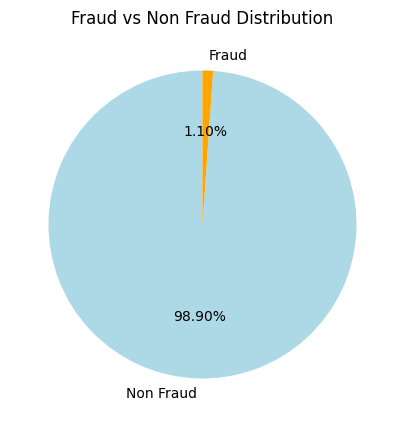

In [93]:
fraud_counts = df['fraud_bool'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(fraud_counts, labels=['Non Fraud', 'Fraud'], autopct='%.2f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Fraud vs Non Fraud Distribution')
plt.show()

In [94]:
features = df.drop(columns=['fraud_bool'])


categorical_features = features.select_dtypes(include=['object', 'category']).columns.tolist()
discrete_candidates = [feat for feat in features.columns if features[feat].dropna().nunique() <= 10]
discrete_features = list(set(discrete_candidates) - set(categorical_features))
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns.difference(discrete_features).tolist()


print("Categorical Features:", categorical_features)
print("Discrete Features:", discrete_features)
print("Numerical Features:", numerical_features)


Categorical Features: ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
Discrete Features: ['phone_mobile_valid', 'customer_age', 'month', 'device_fraud_count', 'device_distinct_emails_8w', 'email_is_free', 'phone_home_valid', 'keep_alive_session', 'has_other_cards', 'income', 'foreign_request']
Numerical Features: ['bank_branch_count_8w', 'bank_months_count', 'credit_risk_score', 'current_address_months_count', 'date_of_birth_distinct_emails_4w', 'days_since_request', 'intended_balcon_amount', 'name_email_similarity', 'prev_address_months_count', 'proposed_credit_limit', 'session_length_in_minutes', 'velocity_24h', 'velocity_4w', 'velocity_6h', 'zip_count_4w']


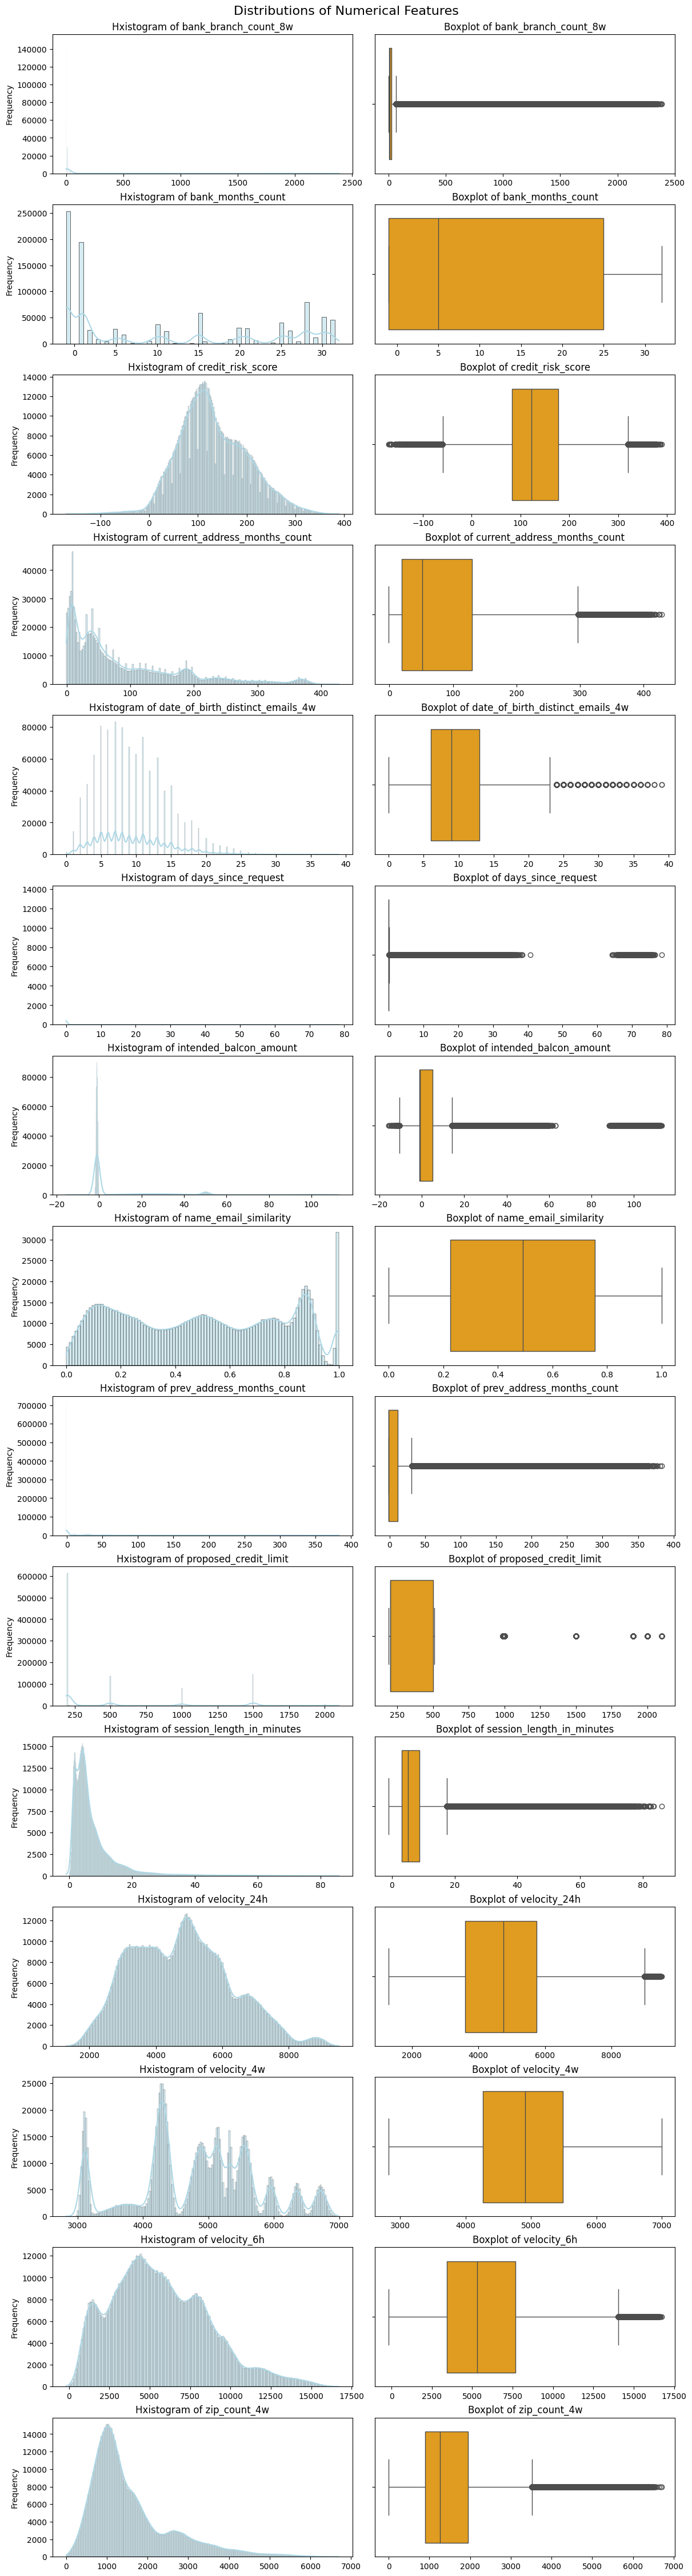

In [95]:
num_numerical = len(numerical_features)


fig, axes = plt.subplots(
    num_numerical, 2,
    figsize=(12, num_numerical *3),
    constrained_layout=True
)


for i, feature in enumerate(numerical_features):
    #Histogram

    sns.histplot(df[feature], ax=axes[i][0], kde=True, color='lightblue')
    axes[i][0].set_title(f"Hxistogram of {feature}")
    axes[i][0].set_xlabel("")
    axes[i][0].set_ylabel("Frequency")

    #Boxplot
    sns.boxplot(x=df[feature], ax=axes[i][1], color='orange')
    axes[i][1].set_title(f"Boxplot of {feature}")
    axes[i][1].set_xlabel("")

plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.show()


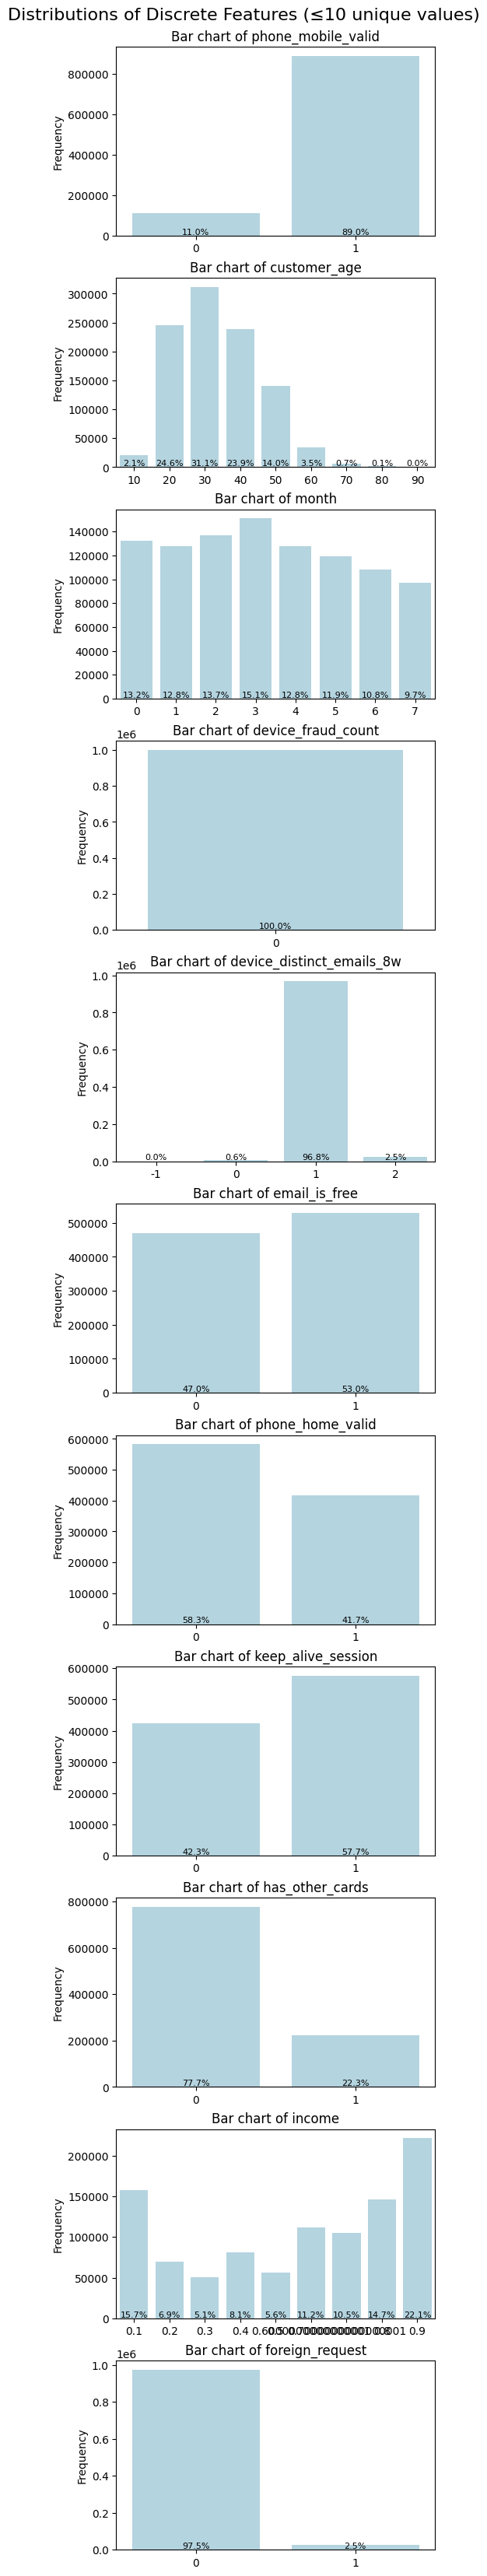

In [96]:
# TODO: For discrete features, make bar graphs with percentage labels
num_discrete = len(discrete_features)

fig, axes = plt.subplots(num_discrete, 1, figsize = (5, num_discrete * 3), constrained_layout=True)


for i, feature in enumerate(discrete_features):
    plot = sns.countplot(data = df, x = feature, ax = axes[i], color = 'lightblue')

    total = len(df[feature].dropna())

    for p in plot.patches:
        height = p.get_height()
        percentage = 100 * height / total
        axes[i].text(
            p.get_x() + p.get_width() / 2,
            0,
            f"{percentage:.1f}%",
            ha = "center",
            va = "bottom",
            fontsize = 8,
        )

    axes[i].set_title(f"Bar chart of {feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")
    axes[i].tick_params(axis='x')

plt.suptitle("Distributions of Discrete Features (≤10 unique values)", fontsize=16)
plt.show()


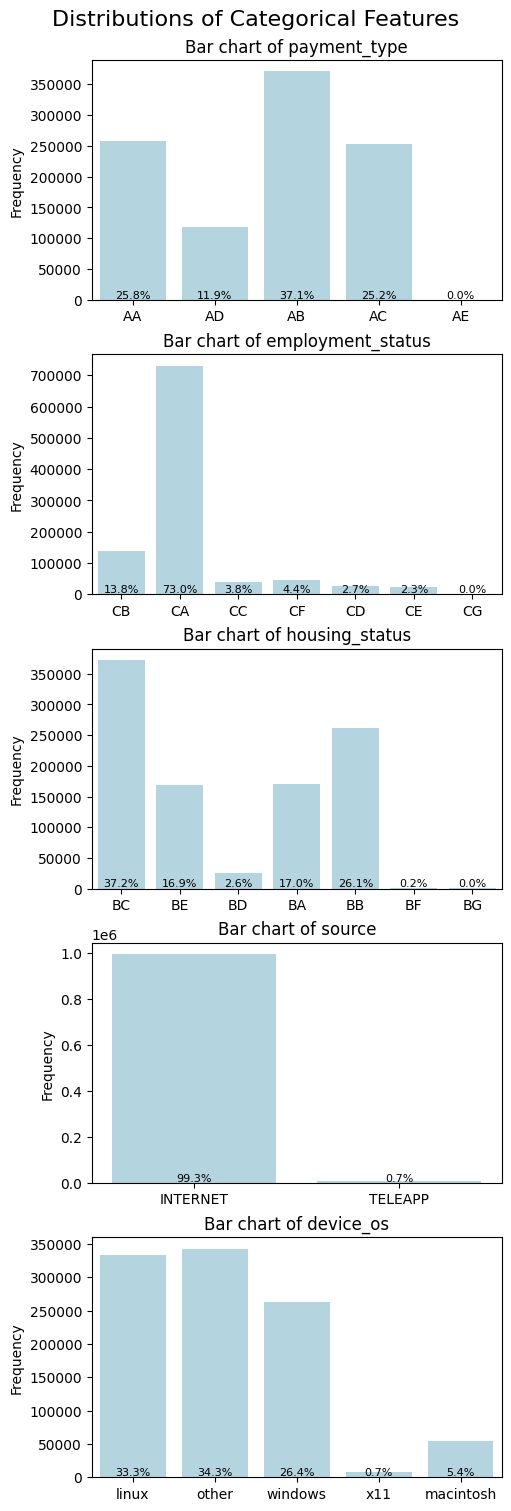

In [97]:
# TODO: For discrete features, make bar graphs with percentage labels
num_categorical = len(categorical_features)

fig, axes = plt.subplots(num_categorical, 1, figsize = (5, num_categorical * 3), constrained_layout=True)


for i, feature in enumerate(categorical_features):
    plot = sns.countplot(data = df, x = feature, ax = axes[i], color = 'lightblue')

    total = len(df[feature].dropna())

    for p in plot.patches:
        height = p.get_height()
        percentage = 100 * height / total
        axes[i].text(
            p.get_x() + p.get_width() / 2,
            0,
            f"{percentage:.1f}%",
            ha = "center",
            va = "bottom",
            fontsize = 8,
        )

    axes[i].set_title(f"Bar chart of {feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")
    axes[i].tick_params(axis='x')

plt.suptitle("Distributions of Categorical Features", fontsize=16)
plt.show()


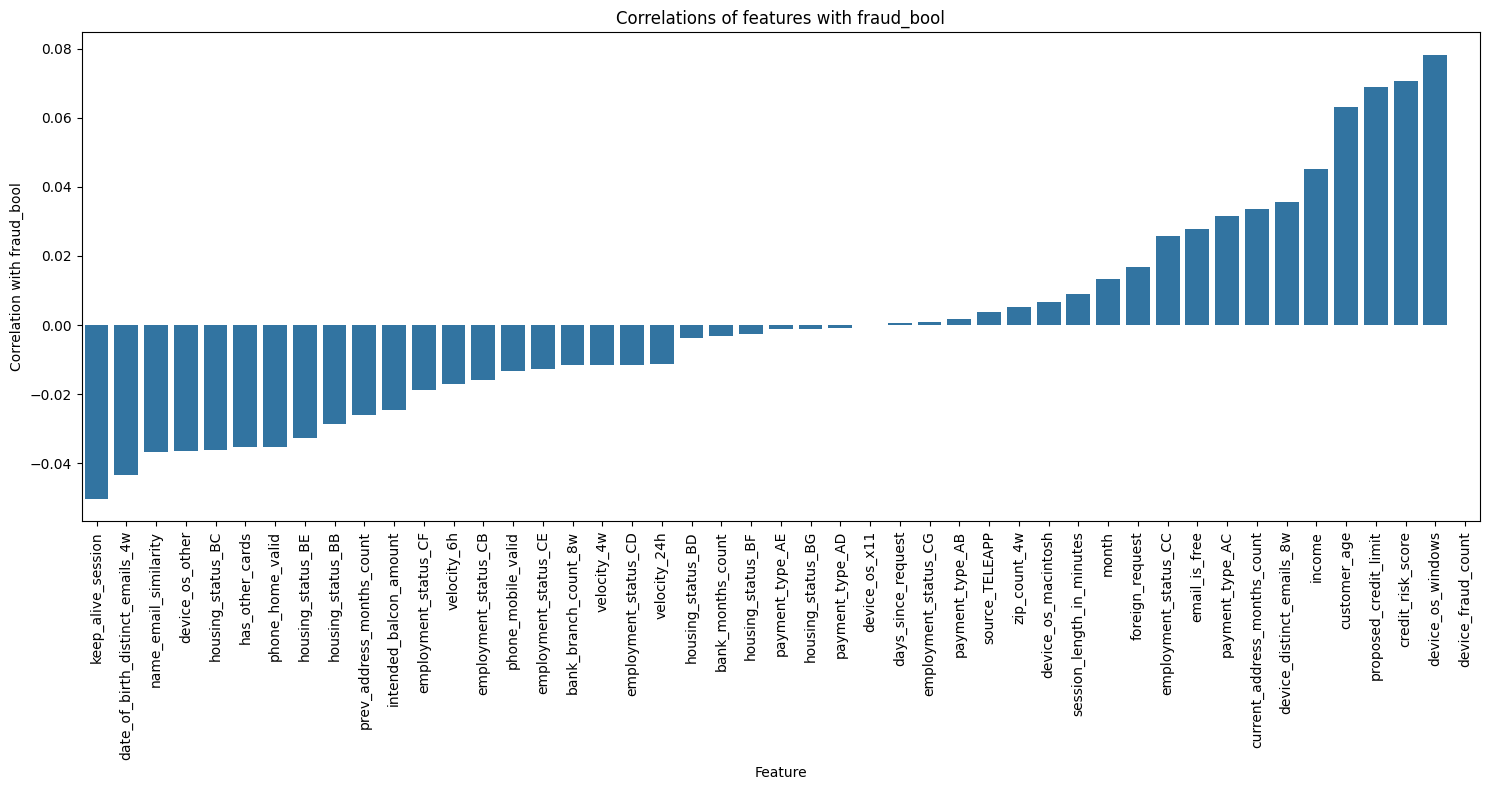

In [98]:
df_oh_encoded = pd.get_dummies(df, drop_first = True)

correlations = df_oh_encoded.corr()[target].drop(target).sort_values()

#Plot correlations
plt.figure(figsize=(15, 8))
sns.barplot(x = correlations.index, y = correlations.values)

plt.xticks(rotation=90)
plt.ylabel('Correlation with fraud_bool')
plt.xlabel('Feature')
plt.title('Correlations of features with fraud_bool')
plt.tight_layout()
plt.show()


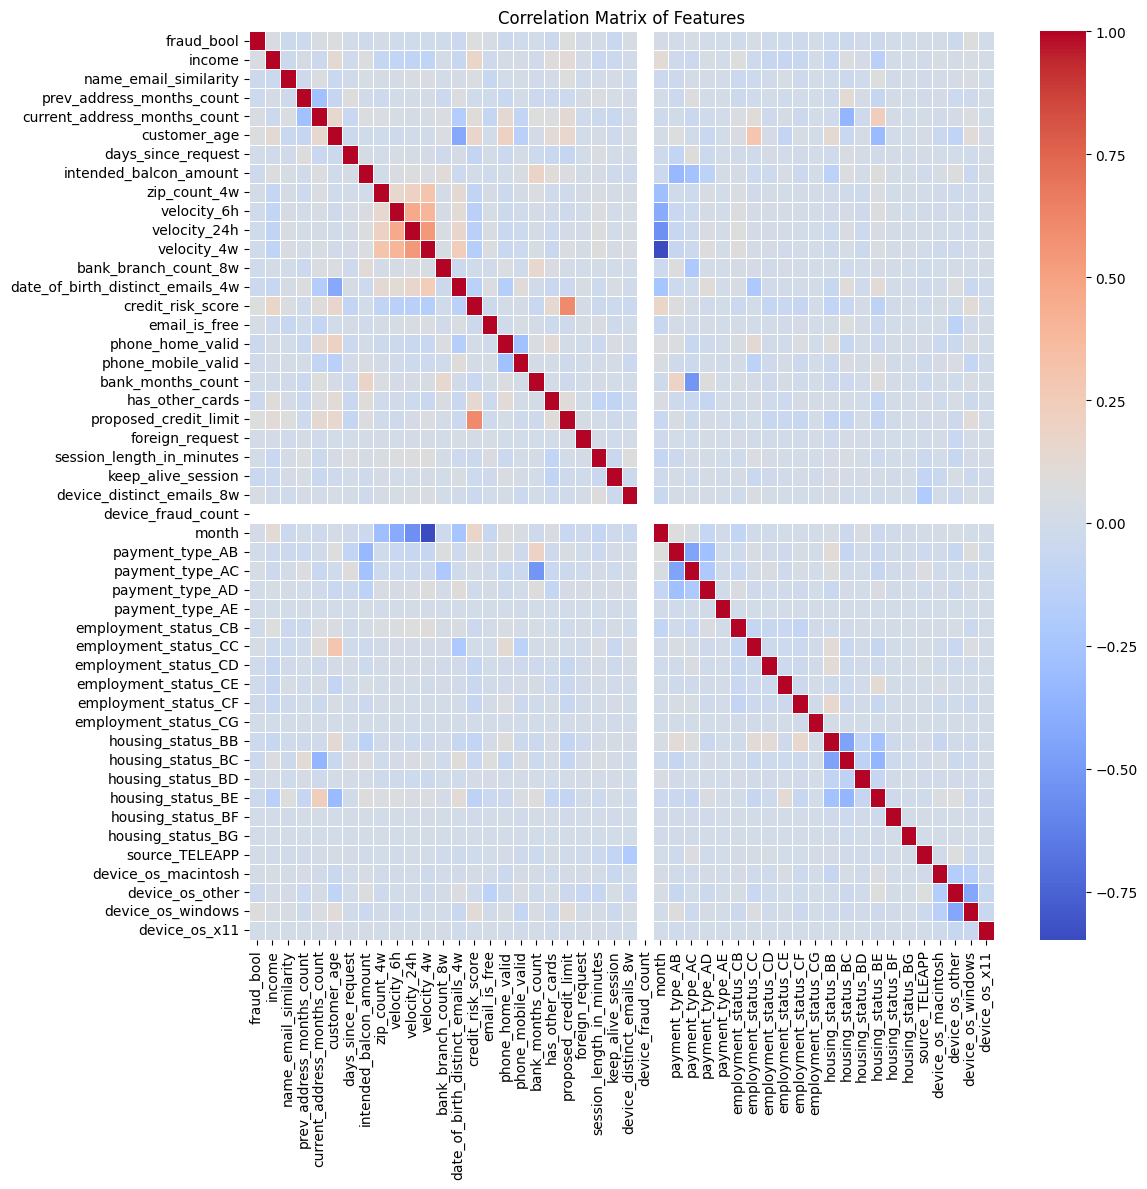

In [99]:
corr_matrix = df_oh_encoded.corr()

plt.figure(figsize=(12, 12))

sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.show()

In [100]:
#Create array of features to drop
features_to_drop = []

In [101]:
#TODO: remove features with absolute correlation lower than a certain threshold

correlations = df.corr(numeric_only=True)[target].abs()

threshold = 0.02

low_corr_features = correlations[correlations <= threshold].index.tolist()

features_to_drop = list(set(features_to_drop).union(low_corr_features))

print(features_to_drop)


['phone_mobile_valid', 'days_since_request', 'month', 'velocity_6h', 'bank_months_count', 'velocity_24h', 'zip_count_4w', 'foreign_request', 'bank_branch_count_8w', 'velocity_4w', 'session_length_in_minutes']


In [102]:
#Features where -1 indicates missing values
cols_missing_data = [
    'device_distinct_emails_8w',
    'current_address_months_count',
    'session_length_in_minutes',
    'bank_months_count',
    'prev_address_months_count'
]



missing_data_info = {
    'Feature': [],
    'Missing Instances Number': [],
    'Missing Instances Percentage': []
}

for col in cols_missing_data:
    total_missing = (df[col] == -1).sum()
    percent_missing = 100 * total_missing / len(df)
    missing_data_info['Feature'].append(col)
    missing_data_info['Missing Instances Number'].append(total_missing)
    missing_data_info['Missing Instances Percentage'].append(percent_missing)

missing_neg1_df = pd.DataFrame(missing_data_info)

missing_neg1_df = missing_neg1_df.sort_values(by='Missing Instances Percentage', ascending=False)

print(missing_neg1_df)


                        Feature  Missing Instances Number  \
4     prev_address_months_count                    712920   
3             bank_months_count                    253635   
1  current_address_months_count                      4254   
2     session_length_in_minutes                      2015   
0     device_distinct_emails_8w                       359   

   Missing Instances Percentage  
4                       71.2920  
3                       25.3635  
1                        0.4254  
2                        0.2015  
0                        0.0359  


In [103]:
high_missing_features = ['prev_address_months_count', 'bank_months_count']
features_to_drop = list(set(features_to_drop).union(high_missing_features))
print(features_to_drop)

['phone_mobile_valid', 'days_since_request', 'month', 'velocity_6h', 'bank_months_count', 'velocity_24h', 'prev_address_months_count', 'zip_count_4w', 'foreign_request', 'bank_branch_count_8w', 'velocity_4w', 'session_length_in_minutes']


In [104]:
#ToDo> remove features with high multicollinarity
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        feature_1 = corr_matrix.columns[i]
        feature_2 = corr_matrix.columns[j]
        correlation = corr_matrix.iloc[i, j]

        if abs(correlation) > 0.8:
            if feature_1 not in features_to_drop and feature_2 not in features_to_drop:
                features_to_drop.append(feature_2)

print(features_to_drop)

['phone_mobile_valid', 'days_since_request', 'month', 'velocity_6h', 'bank_months_count', 'velocity_24h', 'prev_address_months_count', 'zip_count_4w', 'foreign_request', 'bank_branch_count_8w', 'velocity_4w', 'session_length_in_minutes']


In [105]:
numerical_features_to_keep = list(set(numerical_features) - set(features_to_drop))

scaler = StandardScaler()
X_train[numerical_features_to_keep] = scaler.fit_transform(X_train[numerical_features_to_keep])
X_test[numerical_features_to_keep] = scaler.transform(X_test[numerical_features_to_keep])


print("X_train after standardization:")
print(X_train[numerical_features_to_keep].describe().round(2))
print("\nX_test after standardization:")
print(X_test[numerical_features_to_keep].describe().round(2))

X_train after standardization:
       name_email_similarity  intended_balcon_amount  proposed_credit_limit  \
count              800000.00               800000.00              800000.00   
mean                   -0.00                    0.00                  -0.00   
std                     1.00                    1.00                   1.00   
min                    -1.71                   -1.20                  -0.67   
25%                    -0.93                   -0.49                  -0.65   
50%                    -0.01                   -0.47                  -0.65   
75%                     0.91                   -0.18                  -0.03   
max                     1.75                    5.15                   3.25   

       credit_risk_score  date_of_birth_distinct_emails_4w  \
count          800000.00                         800000.00   
mean                0.00                             -0.00   
std                 1.00                              1.00   
min      

In [107]:
#Drop features from X_train and X_test and apply one-hot-encoding
X_train = X_train.drop(columns=features_to_drop, errors='ignore')
X_test = X_test.drop(columns=features_to_drop, errors='ignore')

X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1)


print(X_train_encoded.columns.tolist())


['income', 'name_email_similarity', 'current_address_months_count', 'customer_age', 'intended_balcon_amount', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'has_other_cards', 'proposed_credit_limit', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'source_TELEAPP', 'device_os_macintosh', 'device_os_other', 'device_os_windows', 'device_os_x11']
